In [4]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels 
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns 
import utils

In [5]:
data = pd.read_csv('data/final.csv')
data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,bmi,charges,smoker_no,smoker_yes,categorie_age_Adulte,categorie_age_Jeune,categorie_age_Sénior,bmi_log,charges_log,charges_log2,bmi_log2,smoking_status
0,0,0,0,27.90,16884.9240,0,1,0,1,0,3.328627,9.734176,2.275643,1.202560,1
1,1,1,1,33.77,1725.5523,1,0,0,1,0,3.519573,7.453302,2.008657,1.258340,0
2,2,2,2,33.00,4449.4620,1,0,0,1,0,3.496508,8.400538,2.128296,1.251765,0
3,3,3,3,28.88,3866.8552,1,0,0,1,0,3.363149,8.260197,2.111448,1.212878,0
4,4,4,4,25.74,3756.6216,1,0,0,1,0,3.248046,8.231275,2.107941,1.178054,0


In [6]:
#modeling charges = f(bmi, smoker_yes ....)
model = sm.formula.ols(formula='charges ~ bmi+smoker_yes+categorie_age_Sénior+categorie_age_Adulte -1',
                       data=data)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              3046.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                        0.00
Time:                        10:52:22   Log-Likelihood:                         -12574.
No. Observations:                1256   AIC:                                  2.516e+04
Df Residuals:                    1252   BIC:                                  2.518e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bmi                    133.6677      8.093     16.516      0.000     117.790     149.545
smoker_yes            2.468e+04    367.565     67.142      0.000     2.4e+04    2.54e+04
categorie_age_Sénior  8219.9086    368.155     22.327      0.000    7497.639    8942.178
categorie_age_Adulte  3331.9966    361.622      9.214      0.000    2622.545    4041.448
==============================================================================
Omnibus:                      249.729   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1192.949
Skew:                           0.847   Prob(JB):                    9.00e-260
Kurtosis:                       7.464   Cond. No.                         89.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
resid= fit.resid


Text(0.5, 1.0, 'Reisuals scatter points')

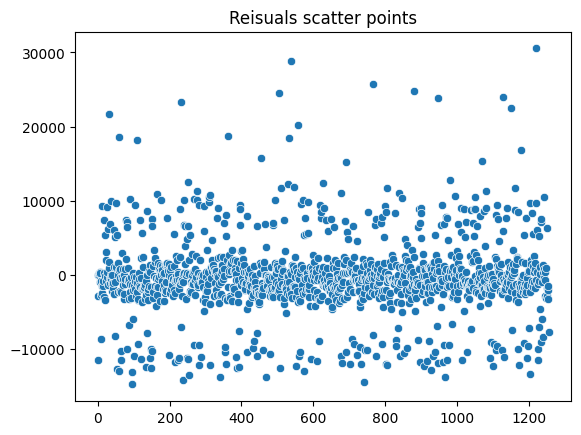

In [8]:
#autocorrelation
sns.scatterplot( resid)
plt.title('Reisuals scatter points')

In [9]:
utils._durbin(resid)

Durbin-Watson Statistic: 1.981997885628786
There’s no significant autocorrelation in your residuals.


In [10]:
utils._ljbox(resid ,12)

Ljung-Box Test Statistic: 16.05808171908213, p-value: 0.18859027497672964
No significant autocorrelation detected in the residuals (do not reject null hypothesis).


In [11]:
#heteroscedaticity
exog = fit.model.exog
utils._white(resid, exog)

White Test Statistic (LM): 366.9812708381721, p-value: 9.880814104196973e-73
White Test Statistic (F): 51.392807283631065, p-value: 1.7729230932703236e-86


'Decision: Reject the null hypothesis. Evidence of heteroskedasticity.'

In [12]:
utils._breuschpg(resid, exog)

Breusch-Pagan Test Statistic: 358.9962731288835, p-value: 2.0018083701035776e-76
Decision: Reject the null hypothesis. There is evidence of heteroskedasticity.


In [13]:
#multicolineairité
utils.detect_multicollinearity(pd.DataFrame(exog))

'No significant multicollinearity detected. Condition number: 2.61. (Threshold: 30)'

In [14]:
#normalité 
utils._kolmogorov_sm(resid)

Kolmogorov-Smirnov Statistic: 0.15902746345949814, p-value: 3.255484879938957e-28
Residuals do not follow a normal distribution (reject null hypothesis).


In [15]:
utils._jarqueb(resid)

Jarque-Bera Statistic: 1192.949413276087, p-value: 9.00173683521649e-260
Residuals are not normally distributed (reject null hypothesis).


<Axes: ylabel='Count'>

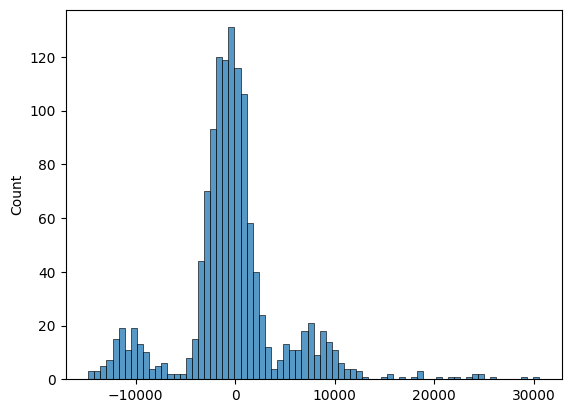

In [16]:
sns.histplot(resid)

In [18]:
utils._white(fit.resid, data['charges'].values)

White Test Statistic (LM): 453.7986613181655, p-value: 2.876555430707931e-99
White Test Statistic (F): 354.40586746339307, p-value: 1.0387953000412236e-122


'Decision: Reject the null hypothesis. Evidence of heteroskedasticity.'

In [19]:
#X = data[['bmi','smoker_yes','categorie_age_Jeune','categorie_age_Adulte']]
#y = data['charges']
#m = statsmodels.gmm.GMM(y,X)